In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
delta = 0.7
alpha=0.4
ECM= 3
epocas=20000
ecm_values = []
epoca= 0

In [4]:
def sigmoide(z):
  return 1.0/(1.0+(np.exp(-z)))

def deri_sig2(x):
  return np.exp(-x)/(1.0+np.exp(-x))**2

In [5]:
X= np.array([[3,127,211],
             [5,200,255],
             [29,8,10]])

X_normalizada= X/255

In [6]:
ECM= 3
ecm_values = []

Epoca:  1
Y obt de la epoca:  [[0.25390509 0.3843141  0.34276324]
 [0.25061925 0.38318547 0.34226471]
 [0.27272108 0.38490006 0.34671106]]
Epoca:  2
Y obt de la epoca:  [[0.16172693 0.391735   0.50018325]
 [0.15931509 0.39004076 0.49968357]
 [0.17707571 0.39606443 0.50401174]]
Epoca:  3
Y obt de la epoca:  [[0.13441411 0.41101775 0.58639969]
 [0.13246928 0.40943028 0.58622   ]
 [0.1468261  0.41444625 0.58802173]]
Epoca:  4
Y obt de la epoca:  [[0.11922048 0.42067446 0.6165767 ]
 [0.11757328 0.4192772  0.61670444]
 [0.12967361 0.42265059 0.61622517]]
Epoca:  5
Y obt de la epoca:  [[0.10912554 0.42521766 0.62705941]
 [0.10769064 0.42403212 0.62744683]
 [0.11817703 0.42559776 0.62509099]]
Epoca:  6
Y obt de la epoca:  [[0.10197507 0.42791479 0.63075997]
 [0.10070226 0.42695729 0.63136799]
 [0.1099658  0.42658025 0.62742733]]
Epoca:  7
Y obt de la epoca:  [[0.09667774 0.42985944 0.63186366]
 [0.09553434 0.42914654 0.63265953]
 [0.10383981 0.42669384 0.62735127]]
Epoca:  8
Y obt de la epoca

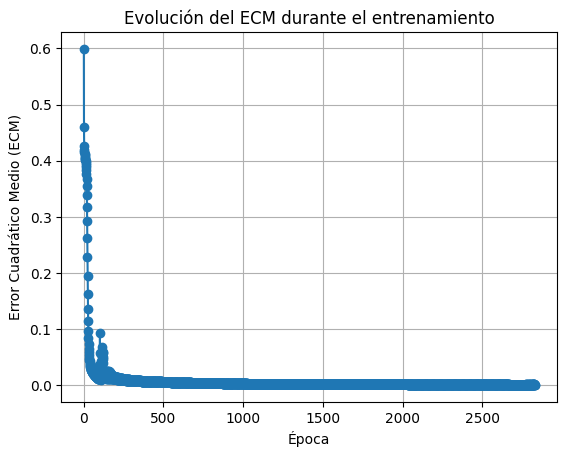

X:  [[  3 127 211]
 [  5 200 255]
 [ 29   8  10]]
Y obt final:  [[  4. 133. 218.]
 [  5. 201. 248.]
 [ 30.  10.  12.]]


In [7]:
#------------------------------------------------------ Parametros ------------------------------------------------

np.random.seed(0)

neuronas_entrada= 3
neuronas_latente= 2
neuronas_salida= 3

W_entrada= 2*np.random.rand(X.shape[1],neuronas_entrada) -1

W_oculta=2*np.random.rand(neuronas_entrada+1,neuronas_latente)-1

W_salida= 2*np.random.rand(neuronas_latente+1,neuronas_salida)-1



W_new_input= np.zeros(W_entrada.shape)
W_old_input= np.zeros(W_entrada.shape)

W_new_hidden= np.zeros(W_oculta.shape)
W_old_hidden= np.zeros(W_oculta.shape)

W_new_output= np.zeros(W_salida.shape)
W_old_output= np.zeros(W_salida.shape)


while(ECM >= 0.001 and epoca<=epocas):
     for j in range (0, X_normalizada.shape[0]): #evalua casos

#for epoca in range (epocas):

        z_entrada = np.dot(X_normalizada,W_entrada) #primera capa
        y_entrada = np.insert(sigmoide(z_entrada),0,-1,axis=1) #primera capa

        z_oculta = np.dot(y_entrada,W_oculta)
        y_oculta = np.insert(sigmoide(z_oculta),0,-1,axis=1)

        z_salida =  np.dot(y_oculta,W_salida)
        Yobt = sigmoide(z_salida)



        aux= (X_normalizada-Yobt)*deri_sig2(z_salida)
        aux2 = np.dot(aux,W_salida[1:, :].T)*deri_sig2(z_oculta)
        aux3 = np.dot(aux2,W_oculta[1:, :].T)*deri_sig2(z_entrada)

        W_salida = W_salida + delta*np.dot(y_oculta.T,aux)
        W_oculta = W_oculta + delta*np.dot(y_entrada.T,aux2)
        W_entrada = W_entrada + delta*np.dot(X_normalizada.T,aux3)


#-------------------Actualizacion con Momentum------------------

        W_new_output = W_salida + alpha*(W_salida- W_old_output)+ delta*np.dot(y_oculta,aux)
        W_old_output = W_salida
        W_salida = W_new_output

        W_new_hidden = W_oculta + alpha*(W_oculta- W_old_hidden)+ delta*np.dot(y_entrada.T,aux2)
        W_old_hidden = W_oculta
        W_oculta = W_new_hidden

        W_new_input = W_entrada + alpha*(W_entrada-W_old_input)+ delta*np.dot(X_normalizada.T,aux3)
        W_old_input = W_entrada
        W_entrada = W_new_input

     ECM = (1/2)*np.sum((X_normalizada-Yobt)**2)
     ecm_values.append(ECM)  # Almacenar el valor actual de ECM
     epoca = epoca + 1
     print("Epoca: ", epoca)
     print("Y obt de la epoca: ", Yobt)


     z_entrada = np.dot(X_normalizada,W_entrada) #primera capa
     y_entrada = np.insert(sigmoide(z_entrada),0,-1,axis=1) #primera capa

     z_oculta = np.dot(y_entrada,W_oculta)
     y_oculta = np.insert(sigmoide(z_oculta),0,-1,axis=1)

     z_salida =  np.dot(y_oculta,W_salida)
     Yobt = sigmoide(z_salida)

# Graficar el ECM a lo largo de las épocas
plt.plot(range(1, epoca+1), ecm_values, marker='o')
plt.xlabel('Época')
plt.ylabel('Error Cuadrático Medio (ECM)')
plt.title('Evolución del ECM durante el entrenamiento')
plt.grid(True)
plt.show()
print("X: ", X)
print("Y obt final: ", np.round(Yobt*255))